#참고 논문

http://www.koreascience.kr/article/JAKO202012764216667.pdf

##독립변수:기초금액, 추정가격, 예가 범위, 낙찰 하한율
##종속변수:낙찰금액

https://data.g2b.go.kr:1443/pt/pubdata/moveCntrwkBidPblancNdProgrsPop.do



#낙찰 하한가에 가장 근접하고 1순위 금액 사이의 금액을 예측하여 낙찰에 필요한 입찰금액을 예측하기 위한 기법을 제안

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

# 경고 무시
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
train =   pd.read_excel('/content/drive/MyDrive/2차입찰금액 예측모델/dataset/2002_2021 최종.xlsx')

In [ ]:
train.head()

,기초금액,추정가격,예가범위,낙찰하한율,낙찰금액
0,61721000,56110000,2,87.75,5.447354e+07
1,64955000,59050000,2,87.75,5.669928e+07
2,139527000,126842730,2,87.75,1.227332e+08
3,459235000,417486364,2,87.75,4.046059e+08
4,880160000,800145454,2,87.75,7.801816e+08


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30475 entries, 0 to 30474
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기초금액    30475 non-null  int64  
 1   추정가격    30475 non-null  int64  
 2   예가범위    30475 non-null  int64  
 3   낙찰하한율   30475 non-null  float64
 4   낙찰금액    30475 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 1.2 MB


In [ ]:
train.columns

Index(['기초금액', '추정가격', '예가범위', '낙찰하한율', '낙찰금액'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
x = train[['기초금액', '추정가격', '예가범위',  '낙찰하한율']]
y = train[['낙찰금액']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [ ]:
print(mlr.score(x_train, y_train))
print(mlr.score(x_test, y_test))

0.9989365817359112
0.9992727912322807


In [ ]:
낙찰금액 = [[33470000	,30427273	,2	,87.745]]																	
my_predict = mlr.predict(낙찰금액)
print(my_predict)

[[32196785.31303924]]


In [ ]:
낙찰금액 = [[66818851	,60744410	,2	,87.745		]]																	
my_predict = mlr.predict(낙찰금액)
print(my_predict)

[[60226345.2361939]]


In [ ]:
낙찰금액 = [[126599000	,115090000	,2	,87.745	]]																	
my_predict = mlr.predict(낙찰금액)
print(my_predict)

[[1.11212782e+08]]


In [ ]:
y_pred = mlr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3621164.5685932776

In [ ]:
y_predict = mlr.predict(x_test)

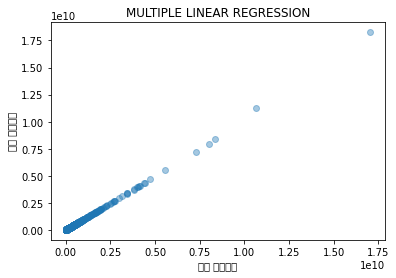

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("실제 낙찰금액")
plt.ylabel("예측 낙찰금액")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

Index(['기초금액', '추정가격', '예가범위', '낙찰하한율', '낙찰금액']

#낙차하한율과는 크게 상관이없다.

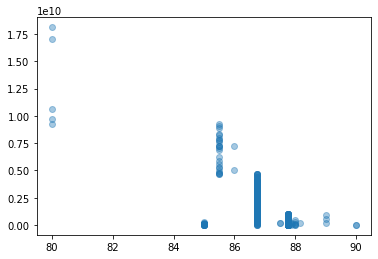

In [ ]:
# 주택의 면적 'size_sqft'과 가격 'rent'
plt.scatter(train[['낙찰하한율']], train[['낙찰금액']], alpha=0.4)
plt.show()

#기초금액과 추정가격은 낙찰금액과 매우 관련이 깊다.

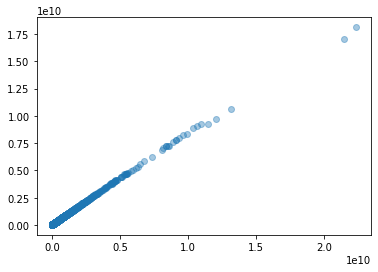

In [ ]:

plt.scatter(train[['기초금액']], train[['낙찰금액']], alpha=0.4)
plt.show()

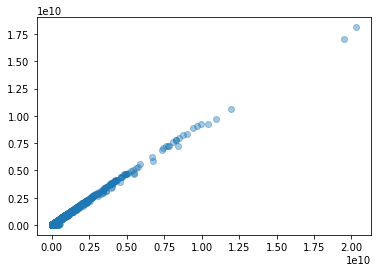

In [ ]:

plt.scatter(train[['추정가격']], train[['낙찰금액']], alpha=0.4)
plt.show()

In [ ]:
print(mlr.score(x_train, y_train))

0.9992391973557031


In [ ]:
print(mlr.score(x_test, y_test))

0.9983388542393452
